# Principal Component Analysis (PCA) on Pokémon Dataset

This notebook demonstrates the application of Principal Component Analysis (PCA) for dimensionality reduction and feature analysis using the Pokémon dataset.

## Import Required Libraries

Import libraries such as pandas, numpy, matplotlib, seaborn, and sklearn for data manipulation, visualization, and PCA.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For PCA and preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# For visualization
import plotly.express as px
import plotly.graph_objects as go

# For displaying plots inline
%matplotlib inline

# Set styling for better visualizations
# plt.style.use('')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## Load and Explore Dataset

Load the Pokémon dataset from a CSV file and perform initial exploration, including checking for missing values and understanding the data structure.

In [3]:
# Load the Pokémon dataset
# Note: Adjust the file path if needed
try:
    df = pd.read_csv('data/pokemon.csv')
except FileNotFoundError:
    try:
        # Alternative path if the file is not in the current directory
        df = pd.read_csv('/home/neel/code/python/pr-assignment/pokemon.csv')
    except FileNotFoundError:
        print("Please download the Pokémon dataset and place it in the appropriate directory")
        # You can add code to download the dataset if needed
        # For example:
        # !wget https://raw.githubusercontent.com/path/to/pokemon.csv

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

# Get basic information about the dataset
print("\nDataset information:")
display(df.info())

# Check for missing values
print("\nMissing values in each column:")
display(df.isna().sum())

# Get statistical summary of numerical features
print("\nStatistical summary of numerical features:")
display(df.describe())

# Get unique values for categorical columns
print("\nUnique Pokémon types:")
if 'type1' in df.columns:
    display(df['type1'].value_counts())
    
print("\nUnique generations:")
if 'generation' in df.columns:
    display(df['generation'].value_counts())
    
print("\nLegendary Pokémon count:")
if 'is_legendary' in df.columns:
    display(df['is_legendary'].value_counts())

First 5 rows of the dataset:


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  agai

None


Missing values in each column:


abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0



Statistical summary of numerical features:


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000



Unique Pokémon types:


type1
water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: count, dtype: int64


Unique generations:


generation
5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: count, dtype: int64


Legendary Pokémon count:


is_legendary
0    731
1     70
Name: count, dtype: int64

### Data Visualization

Let's visualize the distribution of some important features to better understand our dataset.

# Principal Component Analysis on Pokémon Dataset

This notebook implements PCA on the Pokémon dataset to analyze:
1. Core battle stats (attack, defense, hp, etc.)
2. Type effectiveness profiles (weaknesses and resistances)

We'll explore how different Pokémon types and generations cluster together in reduced dimensions.

## 1. Load and Explore Dataset

First, let's import necessary libraries and load the Pokémon dataset.

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set the style for matplotlib plots
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the Pokémon dataset
# Note: You may need to adjust the file path based on your actual data location
try:
    pokemon_df = pd.read_csv('data/pokemon.csv')
except FileNotFoundError:
    # Alternative location
    pokemon_df = pd.read_csv('../data/pokemon.csv')
    
# Display the first few rows
print("Dataset Preview:")
pokemon_df.head()

Dataset Preview:


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [6]:
# Check the shape of the dataset
print(f"Dataset shape: {pokemon_df.shape}")

# Check for basic statistics
print("\nBasic Statistics:")
pokemon_df.describe()

Dataset shape: (801, 41)

Basic Statistics:


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [7]:
# Check for missing values
print("Missing values in each column:")
pokemon_df.isnull().sum()

Missing values in each column:


abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [8]:
# Explore the dataset structure
print("Column names and data types:")
pokemon_df.info()

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 1

## 2. Preprocess Data

Now we'll preprocess the data:
- Handle missing values
- Log-transform skewed features (e.g., height_m, weight_kg)
- Scale numerical features using StandardScaler

In [9]:
# Create a copy of the original dataframe
pokemon_clean = pokemon_df.copy()

# Handle missing values
# For numerical columns, fill with median
numeric_cols = pokemon_clean.select_dtypes(include=['int64', 'float64']).columns
pokemon_clean[numeric_cols] = pokemon_clean[numeric_cols].fillna(pokemon_clean[numeric_cols].median())

# For categorical columns, fill with mode
categorical_cols = pokemon_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    pokemon_clean[col] = pokemon_clean[col].fillna(pokemon_clean[col].mode()[0])

# Check if all missing values have been addressed
print(f"Missing values after handling: {pokemon_clean.isnull().sum().sum()}")

Missing values after handling: 0


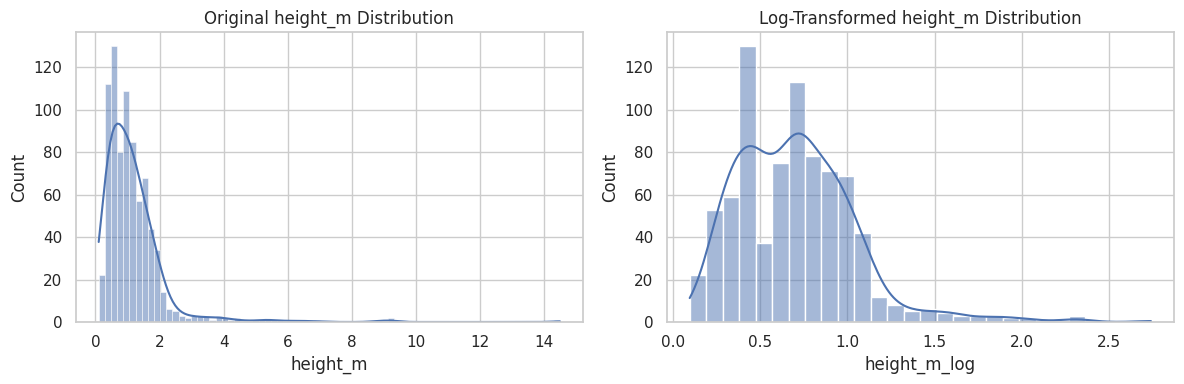

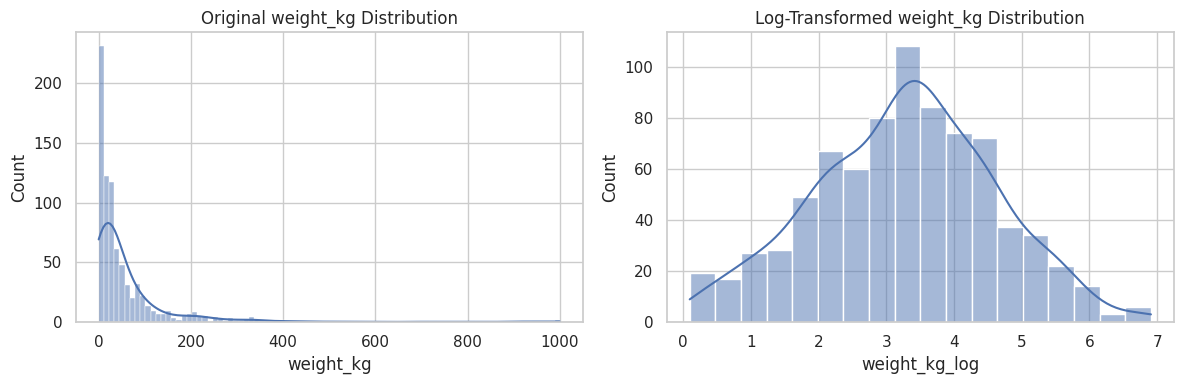

In [10]:
# Log-transform skewed features like height and weight (if they exist)
skewed_features = ['height_m', 'weight_kg']
for feature in skewed_features:
    if feature in pokemon_clean.columns:
        # Add a small constant to avoid log(0)
        pokemon_clean[f'{feature}_log'] = np.log1p(pokemon_clean[feature].replace(0, 0.01))
        
        # Plot original vs log-transformed distribution
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(pokemon_clean[feature], ax=ax[0], kde=True)
        ax[0].set_title(f'Original {feature} Distribution')
        
        sns.histplot(pokemon_clean[f'{feature}_log'], ax=ax[1], kde=True)
        ax[1].set_title(f'Log-Transformed {feature} Distribution')
        plt.tight_layout()
        plt.show()

## 3. PCA on Core Battle Stats

In this section, we'll apply PCA to the core battle stats:
- HP
- Attack
- Defense
- Special Attack
- Special Defense
- Speed
- Base Total (if available)

We'll determine the number of components needed to explain 95% of the variance and interpret the principal components.

In [11]:
# Define core battle stats columns
battle_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Add base_total if it exists, otherwise calculate it
if 'base_total' in pokemon_clean.columns:
    battle_stats.append('base_total')
elif all(stat in pokemon_clean.columns for stat in battle_stats):
    pokemon_clean['base_total'] = pokemon_clean[battle_stats].sum(axis=1)
    battle_stats.append('base_total')

# Check if we have all the required columns
missing_cols = [col for col in battle_stats if col not in pokemon_clean.columns]
if missing_cols:
    print(f"Warning: Missing columns {missing_cols}. Proceeding with available columns.")
    battle_stats = [col for col in battle_stats if col in pokemon_clean.columns]

# Extract battle stats data
battle_data = pokemon_clean[battle_stats].copy()

# Scale the data
scaler = StandardScaler()
battle_data_scaled = scaler.fit_transform(battle_data)

print("Core battle stats to analyze:", battle_stats)

Core battle stats to analyze: ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'base_total']


Number of components needed for 90% variance: 4
Number of components needed for 95% variance: 5


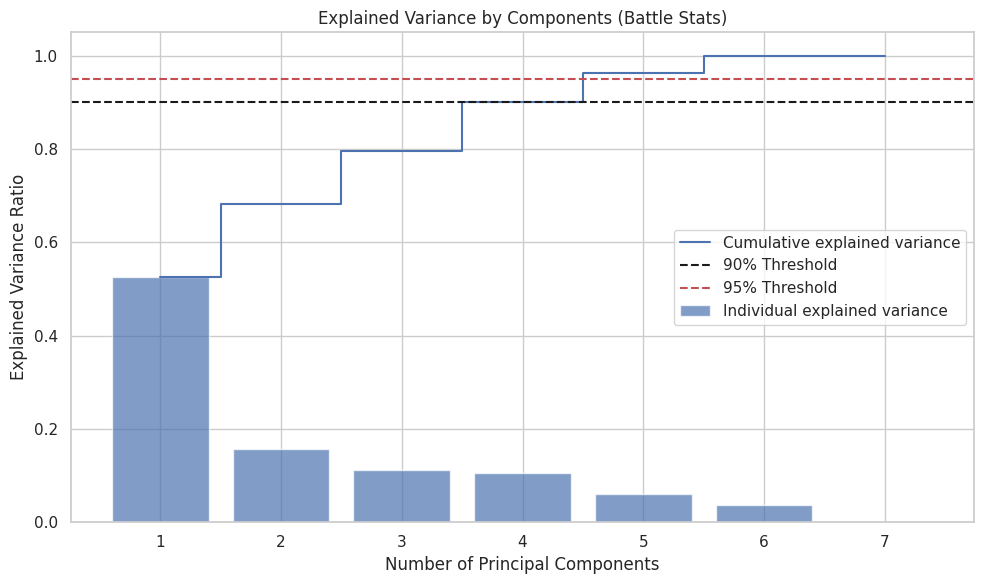

In [12]:
# Apply PCA to battle stats
pca_battle = PCA()
battle_pca = pca_battle.fit_transform(battle_data_scaled)

# Calculate explained variance
explained_variance = pca_battle.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find number of components for 90% and 95% variance
components_90 = np.argmax(cumulative_variance >= 0.9) + 1
components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed for 90% variance: {components_90}")
print(f"Number of components needed for 95% variance: {components_95}")

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.9, linestyle='--', color='k', label='90% Threshold')
plt.axhline(y=0.95, linestyle='--', color='r', label='95% Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Components (Battle Stats)')
plt.legend()
plt.tight_layout()
plt.show()

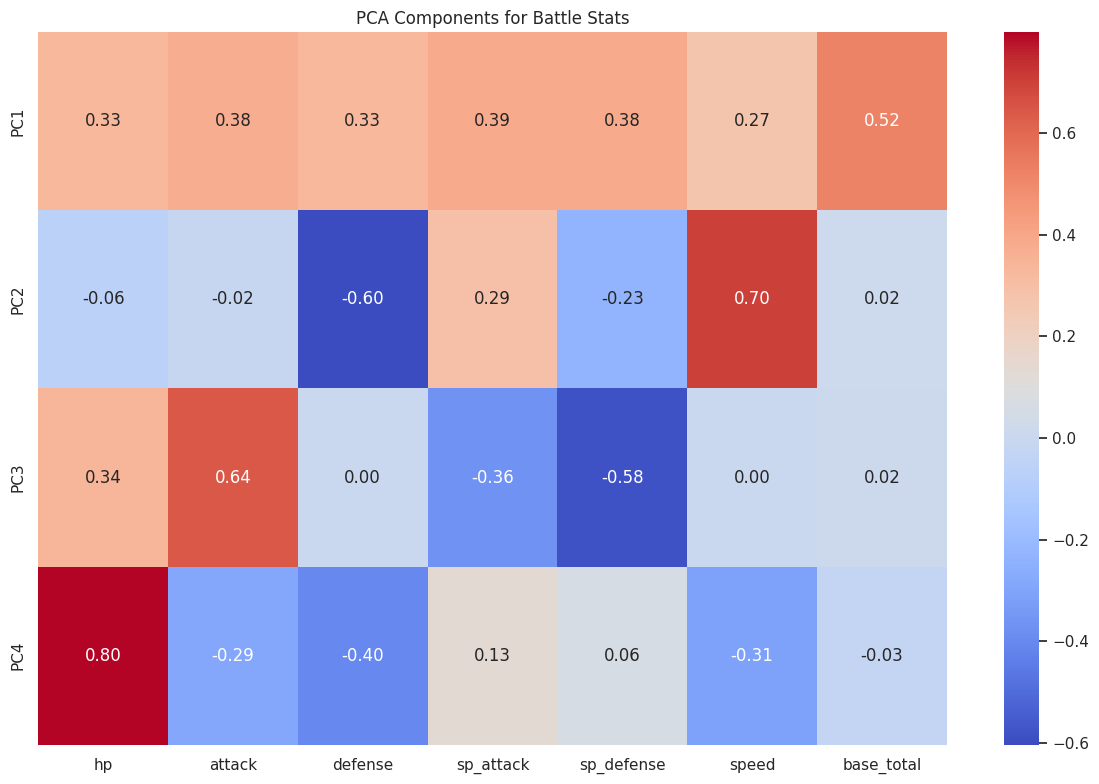

Top 3 Principal Components Interpretation:

PC1 most influential features:
  - base_total: 0.521
  - sp_attack: 0.388
  - sp_defense: 0.383

PC2 most influential features:
  - speed: 0.701
  - defense: -0.603
  - sp_attack: 0.293

PC3 most influential features:
  - attack: 0.643
  - sp_defense: -0.582
  - sp_attack: -0.362


In [13]:
# Analyze PCA components for battle stats
component_df = pd.DataFrame(
    pca_battle.components_,
    columns=battle_stats,
    index=[f'PC{i+1}' for i in range(len(battle_stats))]
)

plt.figure(figsize=(12, 8))
sns.heatmap(component_df.iloc[:4], cmap='coolwarm', annot=True, fmt='.2f')
plt.title('PCA Components for Battle Stats')
plt.tight_layout()
plt.show()

# Detailed analysis of the first 3 principal components
print("Top 3 Principal Components Interpretation:")
for i in range(3):
    pc = component_df.iloc[i].abs().sort_values(ascending=False)
    print(f"\nPC{i+1} most influential features:")
    for feat, val in pc.head(3).items():
        print(f"  - {feat}: {component_df.iloc[i][feat]:.3f}")

## 4. PCA on Type Effectiveness Profile

Now, let's apply PCA to the type effectiveness columns (`against_*`). These columns represent how vulnerable a Pokémon is to different attack types.

In [14]:
# Get type effectiveness columns (columns that start with 'against_')
type_cols = [col for col in pokemon_clean.columns if col.startswith('against_')]

# Check if we have type effectiveness columns
if not type_cols:
    print("No 'against_*' columns found in the dataset. This part of the analysis will be skipped.")
else:
    print(f"Found {len(type_cols)} type effectiveness columns:")
    print(", ".join(type_cols))
    
    # Extract type effectiveness data
    type_data = pokemon_clean[type_cols].copy()
    
    # Scale the data
    type_data_scaled = StandardScaler().fit_transform(type_data)

Found 18 type effectiveness columns:
against_bug, against_dark, against_dragon, against_electric, against_fairy, against_fight, against_fire, against_flying, against_ghost, against_grass, against_ground, against_ice, against_normal, against_poison, against_psychic, against_rock, against_steel, against_water


Number of components needed for 90% variance: 10
Number of components needed for 95% variance: 12


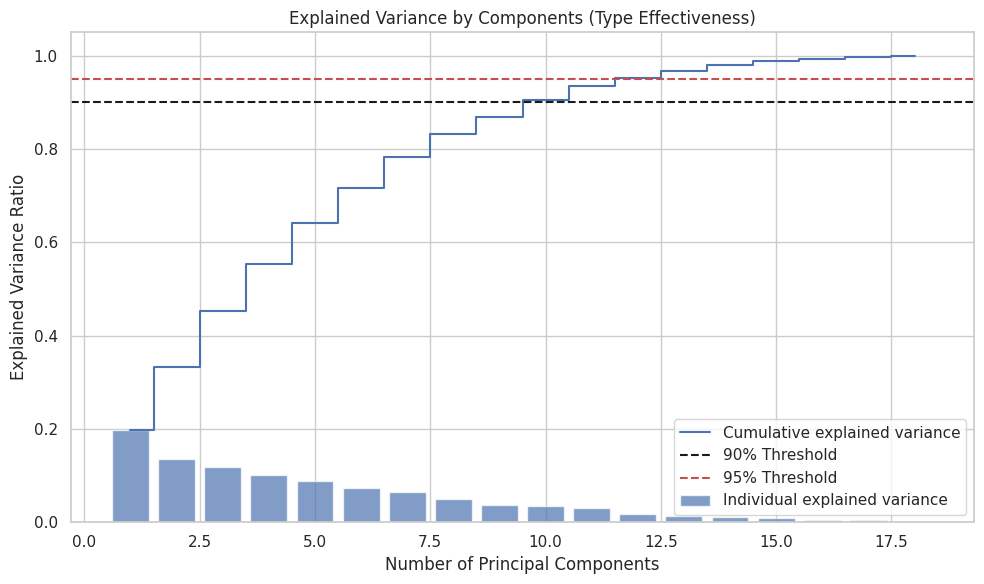

In [15]:
# If we have type effectiveness columns, apply PCA
if len(type_cols) > 0:
    # Apply PCA to type effectiveness data
    pca_type = PCA()
    type_pca = pca_type.fit_transform(type_data_scaled)
    
    # Calculate explained variance
    explained_variance_type = pca_type.explained_variance_ratio_
    cumulative_variance_type = np.cumsum(explained_variance_type)
    
    # Find number of components for 90% and 95% variance
    components_90_type = np.argmax(cumulative_variance_type >= 0.9) + 1
    components_95_type = np.argmax(cumulative_variance_type >= 0.95) + 1
    
    print(f"Number of components needed for 90% variance: {components_90_type}")
    print(f"Number of components needed for 95% variance: {components_95_type}")
    
    # Plot explained variance
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance_type) + 1), explained_variance_type, alpha=0.7, label='Individual explained variance')
    plt.step(range(1, len(cumulative_variance_type) + 1), cumulative_variance_type, where='mid', label='Cumulative explained variance')
    plt.axhline(y=0.9, linestyle='--', color='k', label='90% Threshold')
    plt.axhline(y=0.95, linestyle='--', color='r', label='95% Threshold')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Components (Type Effectiveness)')
    plt.legend()
    plt.tight_layout()
    plt.show()

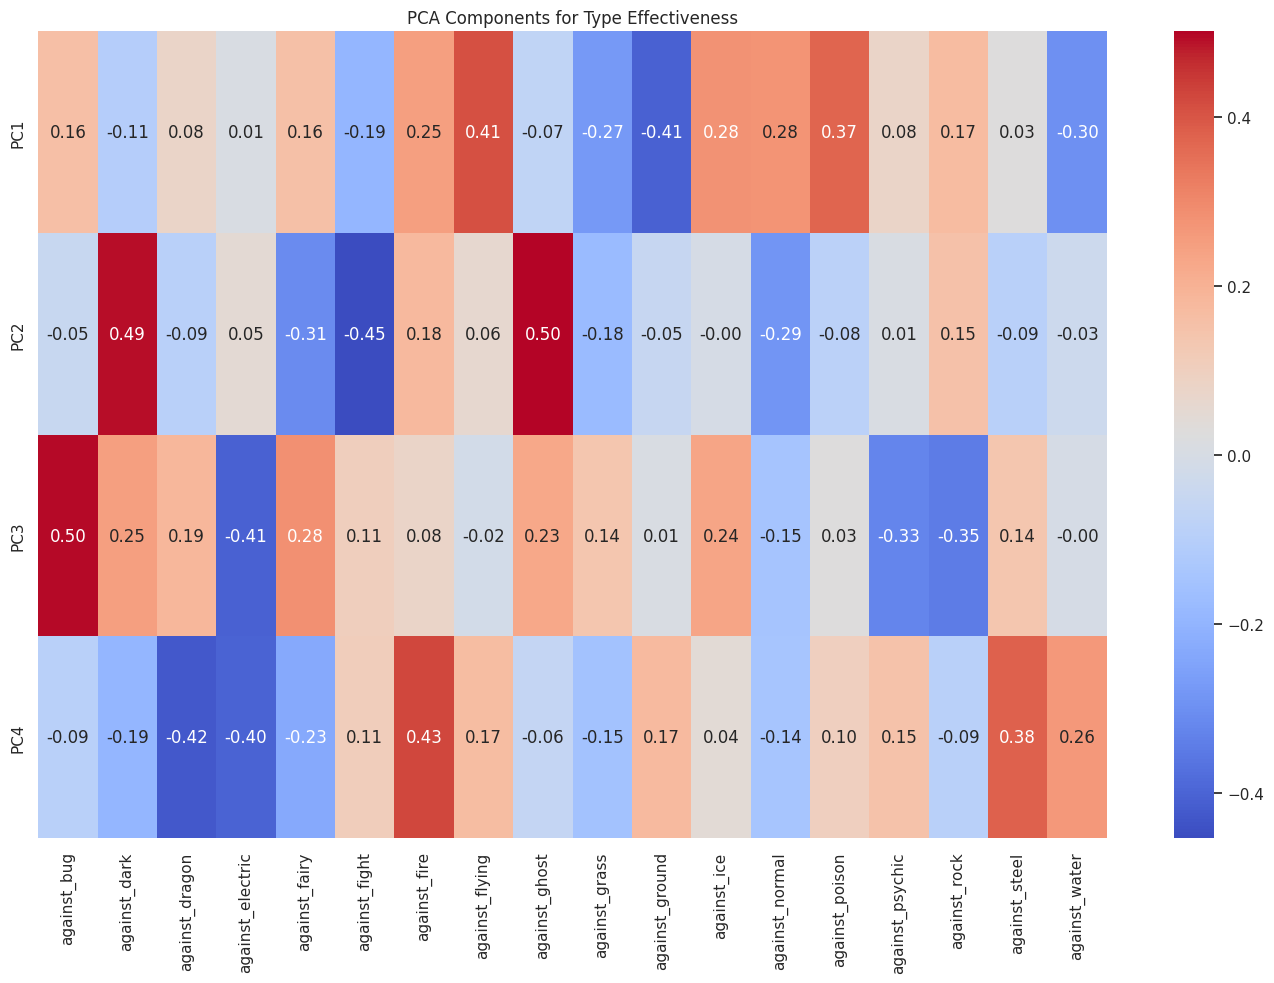

Top 3 Principal Components Interpretation:

PC1 most influential features:
  - against_flying: 0.410
  - against_ground: -0.406
  - against_poison: 0.374

PC2 most influential features:
  - against_ghost: 0.502
  - against_dark: 0.491
  - against_fight: -0.453

PC3 most influential features:
  - against_bug: 0.497
  - against_electric: -0.407
  - against_rock: -0.345


In [16]:
# Analyze PCA components for type effectiveness
if len(type_cols) > 0:
    type_component_df = pd.DataFrame(
        pca_type.components_,
        columns=type_cols,
        index=[f'PC{i+1}' for i in range(len(type_cols))]
    )
    
    # Display the first 4 principal components
    plt.figure(figsize=(14, 10))
    sns.heatmap(type_component_df.iloc[:4], cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('PCA Components for Type Effectiveness')
    plt.tight_layout()
    plt.show()
    
    # Detailed analysis of the first 3 principal components
    print("Top 3 Principal Components Interpretation:")
    for i in range(3):
        pc = type_component_df.iloc[i].abs().sort_values(ascending=False)
        print(f"\nPC{i+1} most influential features:")
        for feat, val in pc.head(3).items():
            print(f"  - {feat}: {type_component_df.iloc[i][feat]:.3f}")

## 5. Visualize PCA Results

Let's create scatter plots to visualize the PCA results. We'll color-code the points by type, legendary status, and generation to identify patterns.

In [17]:
# Add principal components to the original dataframe
pokemon_clean['battle_pc1'] = battle_pca[:, 0]
pokemon_clean['battle_pc2'] = battle_pca[:, 1]

if len(type_cols) > 0:
    pokemon_clean['type_pc1'] = type_pca[:, 0]
    pokemon_clean['type_pc2'] = type_pca[:, 1]

In [18]:
# Create interactive scatter plot for Battle Stats PCA colored by type1
if 'type1' in pokemon_clean.columns:
    fig = px.scatter(
        pokemon_clean, 
        x='battle_pc1', 
        y='battle_pc2',
        color='type1',
        hover_name='name' if 'name' in pokemon_clean.columns else None,
        title='PCA of Battle Stats by Primary Type',
        labels={'battle_pc1': 'PC1', 'battle_pc2': 'PC2'},
        template='plotly_white'
    )
    fig.update_layout(legend_title_text='Type')
    fig.show()

In [19]:
# Create interactive scatter plot for Battle Stats PCA colored by legendary status
if 'is_legendary' in pokemon_clean.columns:
    fig = px.scatter(
        pokemon_clean, 
        x='battle_pc1', 
        y='battle_pc2',
        color='is_legendary',
        hover_name='name' if 'name' in pokemon_clean.columns else None,
        title='PCA of Battle Stats by Legendary Status',
        labels={'battle_pc1': 'PC1', 'battle_pc2': 'PC2'},
        template='plotly_white'
    )
    fig.update_layout(legend_title_text='Legendary')
    fig.show()

In [20]:
# Create interactive scatter plot for Battle Stats PCA colored by generation
if 'generation' in pokemon_clean.columns:
    fig = px.scatter(
        pokemon_clean, 
        x='battle_pc1', 
        y='battle_pc2',
        color='generation',
        hover_name='name' if 'name' in pokemon_clean.columns else None,
        title='PCA of Battle Stats by Generation',
        labels={'battle_pc1': 'PC1', 'battle_pc2': 'PC2'},
        template='plotly_white'
    )
    fig.update_layout(legend_title_text='Generation')
    fig.show()

In [21]:
# Create interactive scatter plots for Type Effectiveness PCA if available
if len(type_cols) > 0:
    # By primary type
    if 'type1' in pokemon_clean.columns:
        fig = px.scatter(
            pokemon_clean, 
            x='type_pc1', 
            y='type_pc2',
            color='type1',
            hover_name='name' if 'name' in pokemon_clean.columns else None,
            title='PCA of Type Effectiveness by Primary Type',
            labels={'type_pc1': 'PC1', 'type_pc2': 'PC2'},
            template='plotly_white'
        )
        fig.update_layout(legend_title_text='Type')
        fig.show()
        
    # By generation
    if 'generation' in pokemon_clean.columns:
        fig = px.scatter(
            pokemon_clean, 
            x='type_pc1', 
            y='type_pc2',
            color='generation',
            hover_name='name' if 'name' in pokemon_clean.columns else None,
            title='PCA of Type Effectiveness by Generation',
            labels={'type_pc1': 'PC1', 'type_pc2': 'PC2'},
            template='plotly_white'
        )
        fig.update_layout(legend_title_text='Generation')
        fig.show()

## Conclusion

In this notebook, we've applied PCA to two different aspects of Pokémon data:

1. **Battle Stats Analysis**:
   - Identified the principal components that explain the variance in battle statistics
   - Visualized how different types and generations of Pokémon cluster in this space
   - Observed patterns related to legendary status

2. **Type Effectiveness Analysis**:
   - Analyzed the patterns of resistances and weaknesses
   - Identified the key combinations of type effectiveness that explain most variance
   - Visualized how Pokémon cluster based on their defensive profiles

This analysis helps us understand the underlying structure of the Pokémon dataset and how different attributes relate to each other in lower-dimensional space.